# Final Project - Group 5

### Data Acquisition

In this step, we will use Python to acquire the data from the provided CSV file.

In [1]:
import pandas as pd

# Assuming the data is in a CSV file named 'car_data.csv' in the same directory
data_file = 'ca-dealers-used.csv'
df = pd.read_csv(data_file)

# Display a sample of the data to verify its acquisition
print(df.head())


              id                vin     price    miles   stock_no    year  \
0  b39ea795-eca9  19UNC1B01HY800062  179999.0   9966.0    V-P4139  2017.0   
1  026cb5b1-6e3e  19UNC1B02HY800023  179995.0   5988.0  PPAP70374  2017.0   
2  5cd5d5b2-5cc2  19UNC1B02HY800071  168528.0  24242.0     B21085  2017.0   
3  b32473ed-5922  19UNC1B02LY800001  220000.0   6637.0     AP5333  2020.0   
4  ac40c9fc-0676  19UNC1B02LY800001  220000.0   6637.0     AP5333  2020.0   

    make model  trim body_type  ... drivetrain transmission  \
0  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
1  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
2  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
3  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
4  Acura   NSX  Base     Coupe  ...        4WD    Automatic   

                     fuel_type engine_size  engine_block  \
0  Electric / Premium Unleaded         3.5             V   
1  Electric / Premium Unleaded        

C:\Users\patel\AppData\Local\Temp\ipykernel_23380\2629731046.py:5: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


In [2]:
df["price"].isna().sum()

35117

In [3]:
mean_price = df['price'].mean()
df['price'].fillna(mean_price, inplace=True)
output_file = 'Final_Dataset_Used_Cars.csv'
df.to_csv(output_file, index=False)

In [4]:
data_file = 'Final_Dataset_Used_Cars.csv'
df = pd.read_csv(data_file)

C:\Users\patel\AppData\Local\Temp\ipykernel_23380\1546806830.py:2: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


### Storing Acquired Data in a Cloud Database

For this demonstration, we will use MongoDB as the cloud database to store the acquired data.

In [5]:
!pip install pymongo

In [6]:
from pymongo import MongoClient

# Connect to MongoDB (Make sure you have the MongoDB server running)
client = MongoClient('mongodb://localhost:27017/')  # Change connection string if needed
db = client['xyz_database']  # Replace 'xyz_database' with the desired database name
collection = db['car_collection']

# Insert the acquired data into the MongoDB collection
records = df.to_dict(orient='records')
collection.insert_many(records)

# Confirmation message
print("Data successfully stored in the MongoDB database.")

Data successfully stored in the MongoDB database.


### Reading data from MongoDb

In [7]:
from pymongo import MongoClient

# Set up MongoDB connection
client = MongoClient('mongodb://localhost:27017/')  # Replace with your MongoDB connection string
db = client['xyz_database']  # Replace with your database name
collection = db['car_collection']

df = pd.DataFrame(list(collection.find()))
df = df.drop('_id', axis = 1)


### Visualization using MatplotLib

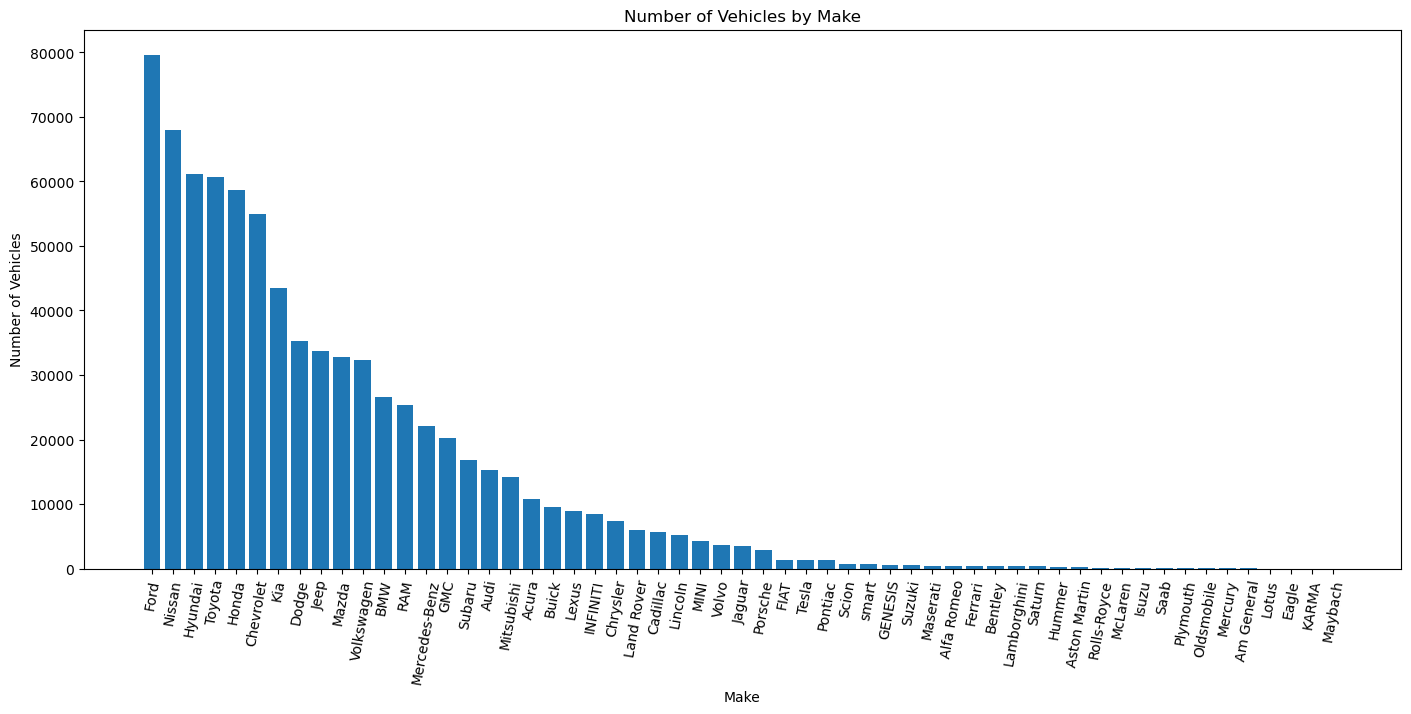

In [8]:
import matplotlib.pyplot as plt

# Data Science Techniques
# Example: Calculate average price and miles
average_price = df['price'].mean()
average_miles = df['miles'].mean()

# Data Visualization
# Example: Create a bar chart to visualize the number of vehicles by make
make_counts = df['make'].value_counts()

# Increase height and width of plot
plt.figure(figsize=(17, 7))

plt.bar(make_counts.index, make_counts.values)
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Make')
plt.xticks(rotation=80)
plt.show()


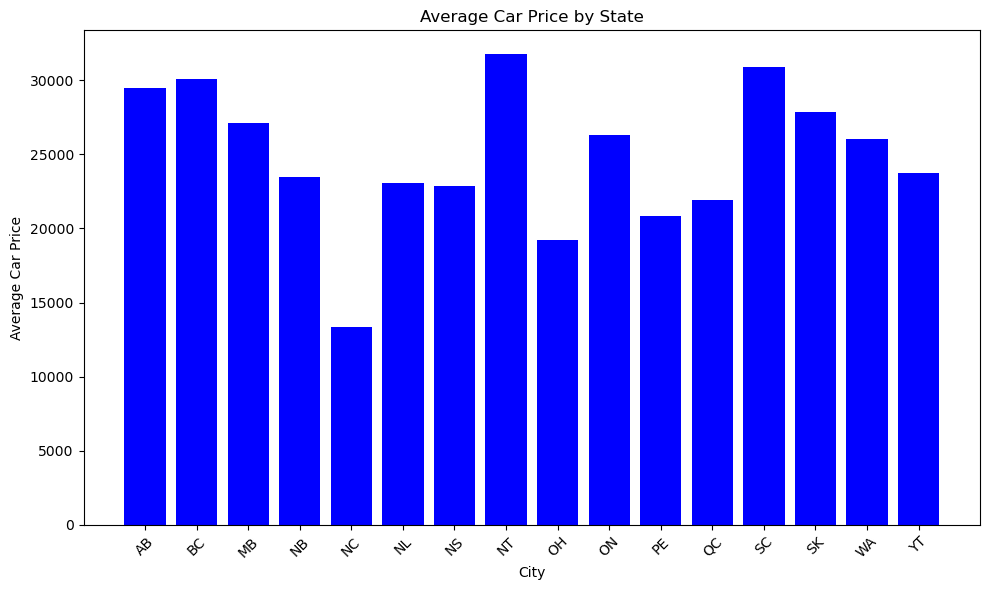

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the data is loaded into the 'df' DataFrame

# Data Science Techniques
average_price_by_city = df.groupby('state')['price'].mean()

# Data Visualization
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_city.index, average_price_by_city.values, color='blue')
plt.xlabel('City')
plt.ylabel('Average Car Price')
plt.title('Average Car Price by State')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

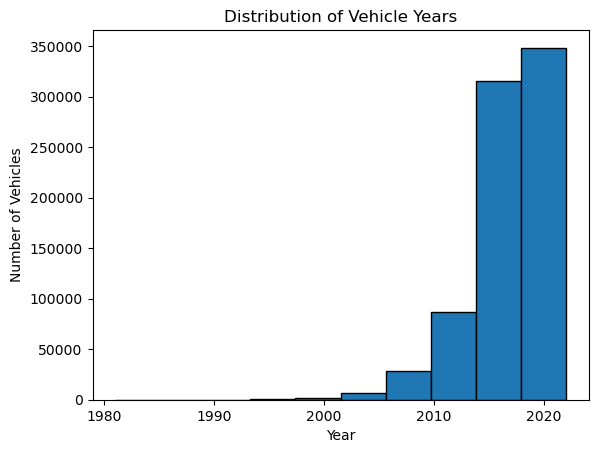

In [10]:
# Additional Visualization 2: Distribution of Vehicle Years
plt.hist(df['year'], bins=10, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Years')
plt.show()

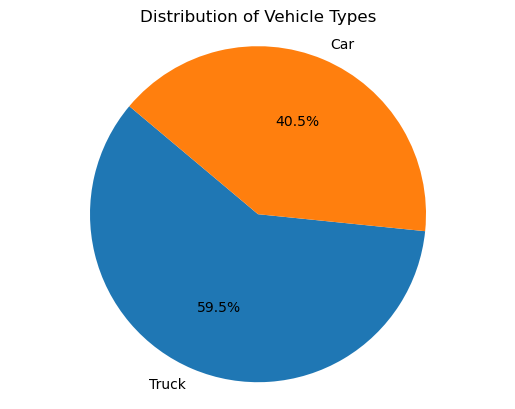

In [11]:
# Create a pie chart to visualize the distribution of vehicle types
vehicle_type_counts = df['vehicle_type'].value_counts()
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Vehicle Types')
plt.show()
